<a href="https://colab.research.google.com/github/samyon7/ML/blob/master/SarcasmDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>SARCASM DETECTION</b><br>
--
AUTHOR : sammyon7

In [1]:
import json 
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [2]:
vocab_size = 10000
embedding_dimension = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [4]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O sarcasm.json

--2020-10-30 09:05:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-10-30 09:05:23 (106 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [7]:
with open('sarcasm.json', 'r') as f: 
  datastore = json.load(f)

sentences = []
labels = []


for item in datastore: 
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

import numpy as np
labels = np.array(labels)

In [10]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[:training_size]
testing_labels = labels[training_size:]

print(len(training_labels))

20000


In [12]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)

training_sequences = tokenizer.texts_to_sequences(training_sentences)

training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length, 
                                padding=padding_type, 
                                truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(testing_sentences)

test_padded = pad_sequences(test_sequences)

In [14]:
print(training_padded.shape)
print(test_padded.shape)

(20000, 100)
(6709, 38)


In [24]:
from keras import layers

model_dense = tf.keras.Sequential([
  layers.Embedding(vocab_size, embedding_dimension,input_length=max_length),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dense(24, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(1,activation='sigmoid')])

model_dense.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
dropout (Dropout)            (None, 100, 16)           0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
________________________________________________

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [26]:
import datetime

!rm -rf ./logs/ 

In [28]:
num_epochs=30

history = model.fit(training_padded, 
          training_labels, 
          epochs = num_epochs, 
          validation_data=(test_padded, testing_labels) 
          )

Epoch 1/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0264 - acc: 0.9924 - val_loss: 1.9708 - val_acc: 0.8153
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0245 - acc: 0.9936 - val_loss: 2.0260 - val_acc: 0.8125
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0232 - acc: 0.9933 - val_loss: 2.1242 - val_acc: 0.8119
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0213 - acc: 0.9937 - val_loss: 2.2133 - val_acc: 0.8098
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0200 - acc: 0.9948 - val_loss: 2.2796 - val_acc: 0.8098
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0198 - acc: 0.9948 - val_loss: 2.3972 - val_acc: 0.8089
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0178 - acc: 0.9948 - val_loss: 2.4556 - val_acc: 0.8085
Epoch 8/30
625/625 [==============================] - 2s 3ms/step - loss: 0.

In [29]:
# Print the accuracy!
_, acc = model.evaluate(test_padded, testing_labels, verbose=0)
print('Accuracry: {}'.format(acc * 100.0))

Accuracry: 79.92249131202698


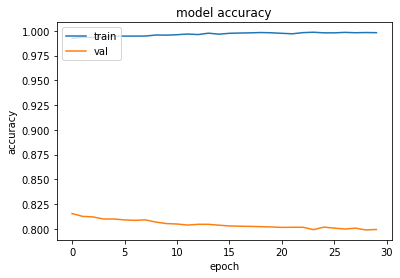

In [30]:
from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

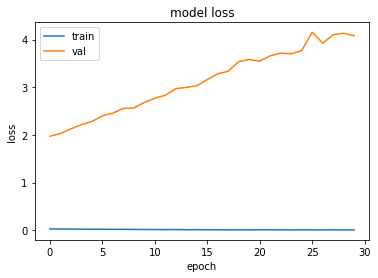

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
word=str(input("Insert the sentences : "))
test_sen = [word]

test_sen_sequences = tokenizer.texts_to_sequences(test_sen)

padded_test_sen_sequences = pad_sequences(test_sen_sequences, 
                                          maxlen=max_length, 
                                          padding=padding_type, 
                                          truncating=trunc_type)

print(model.predict(padded_test_sen_sequences)) # Your words will become even more sarcastic the closer to 1

Insert the sentences : mom starting to fear son's web series closest thing she will have to grandchild
[[1.]]
